# AdaBoost

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
x = df.drop(['target', 'fbs'], axis= 1)
y = df['target']

## Train Test Split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30, stratify=y)
x_train

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
245,48,1,0,124,274,0,166,0,0.5,1,0,3
126,47,1,0,112,204,1,143,0,0.1,2,0,2
147,60,0,3,150,240,1,171,0,0.9,2,0,2
54,63,0,2,135,252,0,172,0,0.0,2,0,2
187,54,1,0,124,266,0,109,1,2.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
274,47,1,0,110,275,0,118,1,1.0,1,1,2
199,65,1,0,110,248,0,158,0,0.6,2,2,1
21,44,1,2,130,233,1,179,1,0.4,2,0,2
233,64,1,0,120,246,0,96,1,2.2,0,1,2


## Model Building

In [19]:
adb_clf = AdaBoostClassifier(random_state=30)
adb_clf.fit(x_train, y_train)


# base_estimator=None,
# n_estimators=50,
# learning_rate=1.0,
# algorithm='SAMME.R',
# random_state=None,

AdaBoostClassifier(random_state=30)

## Model Evaluation

In [21]:
# Testing Accuracy

y_pred = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrics\n", cnf_matrix)
print("-"*60)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy", accuracy)
print("-"*60)

clf_report = classification_report(y_pred, y_test)
print("Classification Report\n",clf_report)

Confusion Matrics
 [[17  3]
 [11 30]]
------------------------------------------------------------
Accuracy 0.7704918032786885
------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.91      0.73      0.81        41

    accuracy                           0.77        61
   macro avg       0.76      0.79      0.76        61
weighted avg       0.81      0.77      0.78        61



In [22]:
# Testing Accuracy

y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrics\n", cnf_matrix)
print("-"*60)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy", accuracy)
print("-"*60)

clf_report = classification_report(y_pred_train, y_train)
print("Classification Report\n",clf_report)


Confusion Matrics
 [[102   9]
 [  8 123]]
------------------------------------------------------------
Accuracy 0.9297520661157025
------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       111
           1       0.93      0.94      0.94       131

    accuracy                           0.93       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.93      0.93      0.93       242



## Feature Selction

<AxesSubplot: >

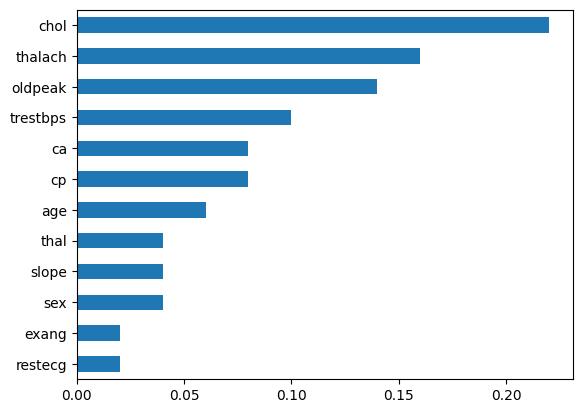

In [23]:
# Feature Importance

s1 = pd.Series(adb_clf.feature_importances_, index=x.columns)
s1.sort_values().plot(kind= 'barh')

# Hyperparameter Tunning

In [30]:
adb_clf = AdaBoostClassifier(random_state=30)

param_grid = {
            "n_estimators" : np.arange(10,200,2),
            "learning_rate" : np.arange(0,2,0.001)
                }

rscv_adb_clf = RandomizedSearchCV(adb_clf, param_grid, cv=7)
rscv_adb_clf.fit(x_train, y_train)
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.024, random_state=30)

In [31]:
# Testing Accuracy

adb_clf = rscv_adb_clf.best_estimator_
adb_clf.fit(x_train, y_train)

y_pred = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrics\n", cnf_matrix)
print("-"*60)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy", accuracy)
print("-"*60)

clf_report = classification_report(y_pred, y_test)
print("Classification Report\n",clf_report)


Confusion Matrics
 [[17  5]
 [11 28]]
------------------------------------------------------------
Accuracy 0.7377049180327869
------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.61      0.77      0.68        22
           1       0.85      0.72      0.78        39

    accuracy                           0.74        61
   macro avg       0.73      0.75      0.73        61
weighted avg       0.76      0.74      0.74        61



In [32]:
# Training Accuracy

y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrics\n", cnf_matrix)
print("-"*60)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy", accuracy)
print("-"*60)

clf_report = classification_report(y_pred_train, y_train)
print("Classification Report\n",clf_report)


Confusion Matrics
 [[ 86   8]
 [ 24 124]]
------------------------------------------------------------
Accuracy 0.8677685950413223
------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        94
           1       0.94      0.84      0.89       148

    accuracy                           0.87       242
   macro avg       0.86      0.88      0.86       242
weighted avg       0.88      0.87      0.87       242



<AxesSubplot: >

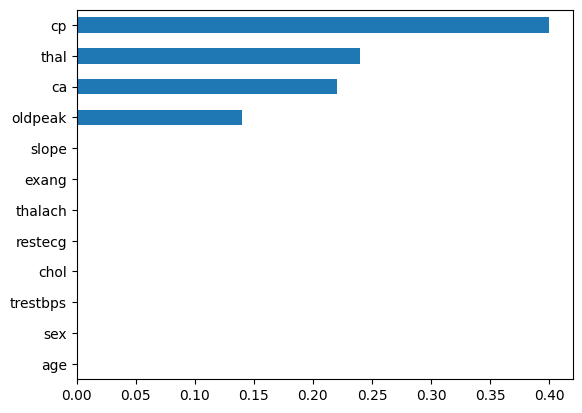

In [33]:
# Feature Importance

s1 = pd.Series(adb_clf.feature_importances_, index=x.columns)
s1.sort_values().plot(kind= 'barh')

2000